In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [42]:
df=pd.read_csv("ASGN4/goog.csv")
df.head()

,Date,Open,High,Low,Close,Volume
0,12/19/2016,790.219971,797.659973,786.270020,794.200012,1225900
1,12/20/2016,796.760010,798.650024,793.270020,796.419983,925100
2,12/21/2016,795.840027,796.676025,787.099976,794.559998,1208700
3,12/22/2016,792.359985,793.320007,788.580017,791.260010,969100
4,12/23/2016,790.900024,792.739990,787.280029,789.909973,623400


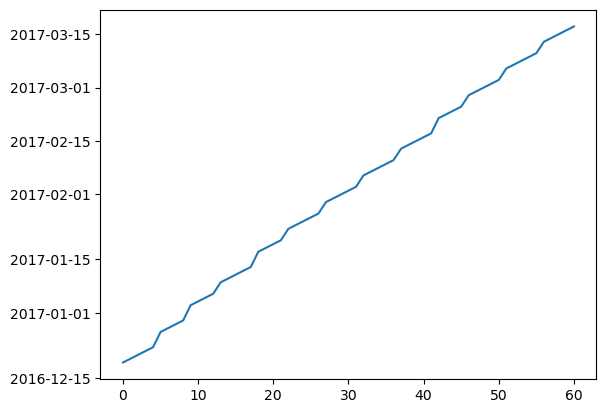

In [43]:
df['Date']=pd.to_datetime(df['Date'])
plt.plot(df['Date'],label='Actual')
plt.show()

In [44]:
df=df['Close']
df=np.array(df).reshape(-1,1)
df=MinMaxScaler().fit_transform(df)

In [45]:
size=int(len(df)*0.8)
df_train=df[:size,:]
df_test=df[size:len(df),:]
print(len(df_train)," ",len(df_test))

48   13


In [46]:
def getdataset(data,size=1):
    x=[]
    y=[]
    for i in range(len(data)-size):
        x.append(data[i:i+size,0])
        y.append(data[i+size,0])
        
    return np.array(x),np.array(y)

x_train,y_train=getdataset(df_train)
x_test,y_test=getdataset(df_test)

In [54]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mae',metrics=['mae'])
model.fit(x_train,y_train,epochs=50)

Epoch 1/50
2/2 [==============================] - 4s 11ms/step - loss: 0.4541 - mae: 0.4541
Epoch 2/50
2/2 [==============================] - 0s 10ms/step - loss: 0.4453 - mae: 0.4453
Epoch 3/50
2/2 [==============================] - 0s 8ms/step - loss: 0.4364 - mae: 0.4364
Epoch 4/50
2/2 [==============================] - 0s 8ms/step - loss: 0.4276 - mae: 0.4276
Epoch 5/50
2/2 [==============================] - 0s 7ms/step - loss: 0.4186 - mae: 0.4186
Epoch 6/50
2/2 [==============================] - 0s 7ms/step - loss: 0.4092 - mae: 0.4092
Epoch 7/50
2/2 [==============================] - 0s 7ms/step - loss: 0.3993 - mae: 0.3993
Epoch 8/50
2/2 [==============================] - 0s 6ms/step - loss: 0.3892 - mae: 0.3892
Epoch 9/50
2/2 [==============================] - 0s 8ms/step - loss: 0.3785 - mae: 0.3785
Epoch 10/50
2/2 [==============================] - 0s 7ms/step - loss: 0.3672 - mae: 0.3672
Epoch 11/50
2/2 [==============================] - 0s 8ms/step - loss: 0.3554 - mae: 0.

1/1 [==============================] - 1s 858ms/step


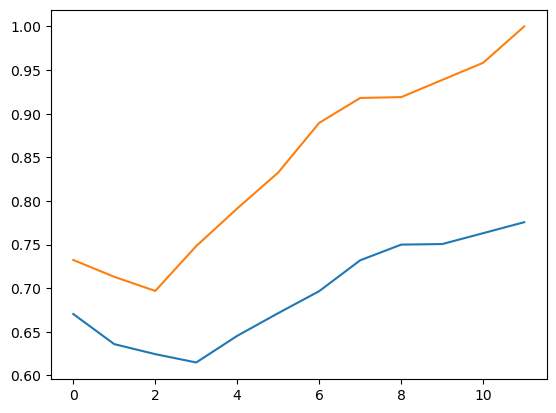

In [55]:
y_pred=np.array(model.predict(x_test)).reshape(-1,1)
y_test=np.array(y_test).reshape(-1,1)
plt.plot(y_pred,label='Predicted')
plt.plot(y_test,label='Actual')